In [202]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import scipy.stats
import nltk
import string
import sklearn.metrics
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import nltk

In [203]:
df = pd.read_csv('tokped.csv',encoding='utf-8',error_bad_lines=False)
df.Status.replace(['Negativ','Positiv'],[0,1],inplace=True)

In [204]:
df.head(10)

,No,Komentar,Status
0,1,dapet mas barang pagi malam dasar anak,0
1,2,flash sale akalan rajin mantengin jam pagi mal...,0
2,3,lihat review orang orang pas beli hp harga fla...,1
3,4,nyobain cuma iseng pembayaran mau jam langsung...,1
4,5,pemberi harapan palsu doang kena tipu kayak ke...,0
5,6,bukalapak wkwkw tokopedia ketinggalan ulang ta...,1
6,7,dapet namanya juga flash sale bawa santai dape...,1
7,8,stock tersedia pas bayar tulisan stock habis k...,0
8,9,ga pernah kebagian astagaaahhh,1
9,10,beneran lihat kepala mata walaubsaya mengakui ...,1


In [205]:
df.columns

Index(['No', 'Komentar', 'Status'], dtype='object')

In [206]:
print(df.shape)

(1225, 3)


In [207]:
print(df.iloc[[10, -4]])

        No Komentar  Status
10      11   boicot       0
1221  1222     pagi       0


In [208]:
#menampilkan jumlah missing data pada setiap kolom
df.isnull().sum()

No          0
Komentar    0
Status      0
dtype: int64

In [209]:
#membuang setiap baris yang didalamnya terdapat missing data
df_clean = df.dropna()
df_clean.describe()

,No,Status
count,1225.000000,1225.000000
mean,613.000000,0.493878
std,353.771348,0.500167
min,1.000000,0.000000
25%,307.000000,0.000000
50%,613.000000,0.000000
75%,919.000000,1.000000
max,1225.000000,1.000000


In [210]:
df["Komentar"] = df['Komentar'].str.replace(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)',' ')

In [211]:
df["Komentar"] = df['Komentar'].str.replace('[^\w\s]',' ')
df["Komentar"] = df['Komentar'].str.replace('\d+',' ')
df.head(10)
#df.tail(5)

,No,Komentar,Status
0,1,dapet mas barang pagi malam dasar anak,0
1,2,flash sale akalan rajin mantengin jam pagi mal...,0
2,3,lihat review orang orang pas beli hp harga fla...,1
3,4,nyobain cuma iseng pembayaran mau jam langsung...,1
4,5,pemberi harapan palsu doang kena tipu kayak ke...,0
5,6,bukalapak wkwkw tokopedia ketinggalan ulang ta...,1
6,7,dapet namanya juga flash sale bawa santai dape...,1
7,8,stock tersedia pas bayar tulisan stock habis k...,0
8,9,ga pernah kebagian astagaaahhh,1
9,10,beneran lihat kepala mata walaubsaya mengakui ...,1


In [212]:
words = df["Komentar"].str.split()
df.iloc[7]

No                                                          8
Komentar    stock tersedia pas bayar tulisan stock habis k...
Status                                                      0
Name: 7, dtype: object

In [213]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
df["Komentar"] = df["Komentar"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df["Komentar"] = df["Komentar"].apply(lambda x: x.lower())
all_words = df["Komentar"].str.split()
all_words = nltk.FreqDist(df["Komentar"])
print(all_words.most_common(15))
#df.head(5)

[('amazing', 10), ('dapet', 10), ('transaksi flash sale kemarin pembayaran via bca virtual account dana terpotong sistem error belanjaan stuck cart produk habis hilang skrg dana terpotong cart logo notification dibuka cart kosong mohon kebijakan tokopedia bagaimanakesal', 10), ('ok', 10), ('gagal beli uang toko bayar langsung ditarik saldo trs dibalikin bank dasar anak informasi', 10), ('flash sale akalan rajin mantengin jam pagi malem sampe nyalain alarm tetep zonk server stock habis coba ku kasar wkwkwkekwk', 5), ('pemberi harapan palsu doang kena tipu kayak keledai', 5), ('beneran lihat kepala mata walaubsaya mengakui kalo sedih bete kena marah', 5), ('boicot', 5), ('teflon frame', 5), ('koneksi indomie calon anak ayam kornet stabil bagus', 5), ('lom beruntung kemarin marah hikz', 5), ('norak kali ikutan flash salekesal wkwk', 5), ('barang', 5), ('nature republic', 5)]


In [214]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df["Komentar"] = df["Komentar"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df["Komentar"] = df["Komentar"].apply(lambda x: x.lower())
print(all_words.most_common(5))
print(stemmer)

[('amazing', 10), ('dapet', 10), ('transaksi flash sale kemarin pembayaran via bca virtual account dana terpotong sistem error belanjaan stuck cart produk habis hilang skrg dana terpotong cart logo notification dibuka cart kosong mohon kebijakan tokopedia bagaimanakesal', 10), ('ok', 10), ('gagal beli uang toko bayar langsung ditarik saldo trs dibalikin bank dasar anak informasi', 10)]


In [215]:
corpus = df["Komentar"]

vectorizer = CountVectorizer()
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'dapet': 196, 'mas': 539, 'barang': 64, 'pagi': 657, 'malam': 532, 'dasar': 198, 'anak': 28, 'flash': 279, 'sale': 770, 'akalan': 14, 'rajin': 740, 'mantengin': 536, 'jam': 387, 'malem': 534, 'sampe': 774, 'nyalain': 634, 'alarm': 19, 'tetep': 895, 'zonk': 990, 'server': 806, 'stock': 842, 'habis': 326, 'coba': 180, 'ku': 489, 'kasar': 423, 'wkwkwkekwk': 969, 'lihat': 514, 'review': 760, 'orang': 645, 'pas': 665, 'beli': 86, 'hp': 360, 'harga': 342, 'nyobain': 638, 'iseng': 380, 'pembayaran': 681, 'langsung': 500, 'dibilang': 207, 'halaman': 337, 'flashsale': 280, 'aneh': 29, 'bin': 121, 'ajaib': 11, 'pemberi': 684, 'harapan': 341, 'palsu': 661, 'doang': 239, 'kena': 448, 'tipu': 905, 'kayak': 427, 'keledai': 441, 'bukalapak': 154, 'wkwkw': 967, 'tokopedia': 912, 'ketinggalan': 461, 'ulang': 939, 'tahunnya': 864, 'pelit': 679, 'parah': 663, 'kalah': 414, 'diskonan': 

In [216]:
# Data training
X = df[['Komentar']]
Y = df[['Status']]
x_train, x_test, y_train, y_test = train_test_split(X['Komentar'],Y['Status'],test_size=0.2,random_state=0) # 70% training and 30% test

In [217]:
print('x_train=',x_train.shape)
print('x_test=',x_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

x_train= (980,)
x_test= (245,)
y_train= (980,)
y_test= (245,)


In [218]:
vec = CountVectorizer(max_features=10000,binary=True)
x_train_vect = vec.fit_transform(x_train)
counts = df.Status.value_counts()
print(counts) # 0 = NEGATIF, 1 = POSITIF

0    620
1    605
Name: Status, dtype: int64


In [219]:
vec = CountVectorizer()
vec.fit(X['Komentar'])

x_train = vec.transform(x_train)

x_test = vec.transform(x_test)

In [220]:
NB = MultinomialNB(alpha=.3)
#print(y_train)
NB.fit(x_train,y_train)
NB_predicted = NB.predict(x_test)
NBC = NB.score(x_test,y_test)
print("\nAccuracy of Naive Bayes Classifier: ",NBC*100,"%\n")


Accuracy of Naive Bayes Classifier:  90.61224489795919 %



In [221]:
x_test_vect = x_test
y_pred = NB_predicted

In [222]:
v = np.array([1, 5, 3])
C = np.zeros((v.shape[0], v.max()))

In [223]:
S = LinearSVC()
S.fit(x_train,y_train)
S_predicted = S.predict(x_test)
SC = S.score(x_test,y_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print("\nAccuracy of Linear Support Vector Classifier: ",SC*100,"%\n")

[[114  14]
 [  9 108]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       128
           1       0.89      0.92      0.90       117

   micro avg       0.91      0.91      0.91       245
   macro avg       0.91      0.91      0.91       245
weighted avg       0.91      0.91      0.91       245


Accuracy of Linear Support Vector Classifier:  97.95918367346938 %



In [224]:
print('TN = ', confussion_array[0,0]) #True Negative
print('FN = ', confussion_array[1,0]) #False Negative
print('TP = ', confussion_array[1,1]) #True Negative
print('FP = ', confussion_array[0,1]) #False Negative

TN =  114
FN =  9
TP =  108
FP =  14


In [225]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy : {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("F1 Score : {:.2f}%".format(f1_score(y_test,y_pred)*100))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy : 90.61%
F1 Score : 90.38%
Confusion Matrix : 
 [[114  14]
 [  9 108]]


In [250]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

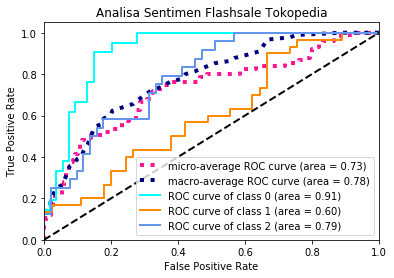

In [251]:
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
#iris = datasets.load_iris()
X = df[['Komentar']]
y = df[['Status']]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Analisa Sentimen Flashsale Tokopedia')
plt.legend(loc="lower right")
plt.show()